In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
def get_x(line):
    return line.coords[0][0]

def get_y(line):
    return line.coords[0][1]

def get_x_destination(line):
    return line.coords[1][0]

def get_y_destination(line):
    return line.coords[1][1]

In [2]:
df_activities_gpkg=gpd.read_file('data/activities.gpkg')

In [41]:
gdf_idf_communes.crs

<Derived Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
gdf_idf_communes=gpd.read_file('data\communes\communes-dile-de-france-au-01-janvier.shp').to_crs(df_activities_gpkg.crs)
gdf_idf_communes['insee']=gdf_idf_communes.insee.astype('int')
gdf_idf_communes['numdep']=gdf_idf_communes.numdep.astype('int')
gdf_idf_communes=gdf_idf_communes[['numdep','insee','geometry']]
gdf_idf_communes

,numdep,insee,geometry
0,77,77472,"POLYGON ((719300.000 6862265.000, 719025.000 6..."
1,91,91315,"POLYGON ((652141.000 6821256.000, 652003.000 6..."
2,78,78472,"POLYGON ((614174.000 6818160.000, 613852.000 6..."
3,77,77038,"POLYGON ((670513.000 6824029.000, 670617.000 6..."
4,78,78672,"POLYGON ((627350.000 6869424.000, 626591.000 6..."
...,...,...,...
1282,78,78522,"POLYGON ((623157.000 6831138.000, 622832.000 6..."
1283,77,77388,"POLYGON ((713444.000 6871672.000, 712473.000 6..."
1284,75,75113,"POLYGON ((651823.000 6857499.000, 651706.000 6..."
1285,75,75118,"POLYGON ((650654.000 6865040.000, 650881.000 6..."


In [60]:
df_homes_gpkg=gpd.read_file('data/homes.gpkg')

In [61]:
df_persons=pd.read_csv('data/persons.csv',';')

C:\Users\saadi\Anaconda3\envs\coworking\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
#df_persons.head(5).merge(df_homes_gpkg, on='household_id')
#df = gpd.GeoDataFrame(df_persons.head(10).merge(df_homes_gpkg, on='household_id'), geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [71]:
df_homes_gpkg=gpd.sjoin(df_homes_gpkg, gdf_idf_communes, how="left", op='intersects').drop('index_right', axis=1)

In [74]:
df_persons=df_persons.merge(df_homes_gpkg, on='household_id').drop('geometry', axis=1)

In [77]:
df_persons.to_csv('data/all/persons-30PC.csv', sep=';')

In [30]:
df_activities_gpkg_copy=df_activities_gpkg.copy()

In [31]:
#from shapely import wkt
#df_activities_gpkg_copy['str_geom']=df_activities_gpkg_copy.geometry.apply(lambda x: wkt.dumps(x))
#print('ok')

df_activities_gpkg_copy['uid']=df_activities_gpkg_copy.geometry.astype('str').astype('category').cat.codes




In [50]:
df_activities_gpkg_copy=gpd.sjoin(df_activities_gpkg_copy, gdf_idf_communes, how="left", op='intersects').drop('index_right', axis=1)

In [78]:
pd.DataFrame(df_activities_gpkg_copy.drop(columns='geometry')).to_csv('data/all/full_activities_with_ids-30PC.csv')

#df_activities_gpkg_copy.head().to_csv('data/all/full_activities_with_ids-30PC.csv')

In [54]:
#df_activities_gpkg_copy['insee']=df_activities_gpkg_copy['insee'].astype(int)
#df_activities_gpkg_copy['numdep']=df_activities_gpkg_copy['numdep'].astype(int)

In [285]:
df_activities=pd.read_csv('data/activities.csv',';')

C:\Users\saadi\Anaconda3\envs\contact_network\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [306]:
df_persons=pd.read_csv('data/persons.csv',';')
df_persons['person_id_gt']=df_persons.index

df_activities_with_ids=df_activities.merge(df_persons[['person_id','person_id_gt']], on='person_id')

labels=['work', 'education', 'leisure', 'shop', 'other']

for label in labels:
    pd.DataFrame(df_activities_with_ids[df_activities_with_ids['purpose']==label].person_id_gt.unique(), columns=['person_id']).to_csv('files/persons_in_'+label+'.csv')
    

C:\Users\saadi\Anaconda3\envs\contact_network\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [303]:
total=0

for label in labels:
    total+=pd.read_csv('files/persons_in_'+label+'.csv').shape[0]
    
total==df_persons.shape[0]

False

In [305]:
total

4746014

In [247]:
gdf_idf_communes=gpd.read_file('data\communes\communes-dile-de-france-au-01-janvier.shp')
#mp=gdf_idf.copy()

In [248]:
df=pd.read_csv('C:/Users/saadi/Documents/ile-de-france/output/trips.csv',';')

gdf_idf=gpd.read_file('data\iris_2017\idf-iris.shp')
mp=gdf_idf.copy()

C:\Users\saadi\Anaconda3\envs\contact_network\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [267]:
gdf_idf_departements=gpd.read_file('data\dep\geoflar-departements.shp').to_crs(gdf_idf.crs)
gdf_idf_communes=gpd.read_file('data\communes\communes-dile-de-france-au-01-janvier.shp').to_crs(gdf_idf.crs)


#mp=gdf_idf.copy()

In [313]:
gdf_idf_communes.shape

(1287, 10)

In [395]:
gdf_raws=gpd.read_file('C:/Users/saadi/Documents/ile-de-france/output/trips.gpkg', rows=100000) # It takes several minutes to be loaded !

In [725]:
import time

a=time.time()
gdf_activities=gpd.read_file('C:/Users/saadi/Documents/ile-de-france/output/activities.gpkg')

print('Computer run-time is {}'.format(np.round(time.time()-a,2)))

Computer run-time is 703.95


In [2]:
2900/3600*60

48.333333333333336

In [4]:
2996/3600*60

49.93333333333333

In [776]:
gdf_activities_adjusted=gdf_activities.copy()

In [779]:
gdf_activities_adjusted.memory_usage(deep=True)

Index                         128
person_id               115355672
household_id            115355672
activity_index          115355672
preceding_trip_index    115355672
following_trip_index    115355672
purpose                 889369526
start_time              115355672
end_time                115355672
is_first                 14419459
is_last                  14419459
geometry                115355672
dtype: int64

In [794]:
pp=gdf_activities_adjusted['geometry'].unique()
df_mapping=pd.DataFrame({'uid': np.arange(len(pp)), 'geometry': pp})
mtable=gdf_activities_adjusted.merge(df_mapping, on='geometry')

# mtable.drop(['geometry', 'x', 'y'], axis=1).to_csv('files/full_activities_with_ids.csv')


In [818]:
df_full_activities=pd.read_csv('files/full_activities_with_ids.csv').drop(['Unnamed: 0'], axis=1).rename(columns={'uid':'location_id'})
df_full_activities.head()

,person_id,household_id,activity_index,preceding_trip_index,following_trip_index,purpose,start_time,end_time,is_first,is_last,location_id
0,6,2,0,-1,0,home,NaN,28289.0,True,False,0
1,6,2,3,2,-1,home,67289.0,NaN,False,True,0
2,7,2,0,-1,0,home,NaN,32240.0,True,False,0
3,7,2,2,1,2,home,44240.0,48440.0,False,False,0
4,7,2,4,3,-1,home,60440.0,NaN,False,True,0


In [822]:
df_full_activities=df_full_activities[df_full_activities['purpose']!='home']

In [828]:
df_full_activities[(~df_full_activities.start_time.isnull())&(~df_full_activities.end_time.isnull())]

,person_id,household_id,activity_index,preceding_trip_index,following_trip_index,purpose,start_time,end_time,is_first,is_last,location_id
18,6,2,1,0,1,other,28889.0,28949.0,False,False,1
19,359525,191823,3,2,3,other,46103.0,47903.0,False,False,1
20,423777,225893,5,4,5,other,58829.0,58949.0,False,False,1
21,1167673,621133,1,0,1,other,37534.0,39934.0,False,False,1
22,1168228,621414,2,1,2,other,30240.0,30540.0,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...
14395905,11754068,5221782,2,1,2,work,31173.0,63573.0,False,False,1078665
14396036,11754349,5222063,3,2,3,other,54012.0,55812.0,False,False,1078721
14396376,11755352,5223066,3,2,3,other,56001.0,59001.0,False,False,1078856
14396906,11757344,5225058,1,0,1,work,22735.0,51535.0,False,False,1079061


In [775]:
cpt=0

with tqdm(total=gdf_activities_adjusted.shape[0]) as pbar:

    for k in gdf_activities['geometry'].head():
        x=k.coords[0][0]
        y=k.coords[0][0]
        print({'x': x, 'y': y, 'uid': cpt})
        cpt+=1
        pbar.update(1)

  0%|                | 5/14419459 [00:00<2:24:06, 1667.72it/s]

{'x': 654893.04, 'y': 654893.04, 'uid': 0}
{'x': 654969.59, 'y': 654969.59, 'uid': 1}
{'x': 645355.8, 'y': 645355.8, 'uid': 2}
{'x': 654893.04, 'y': 654893.04, 'uid': 3}
{'x': 654893.04, 'y': 654893.04, 'uid': 4}


In [782]:
[k.coords[0][0] for k in gdf_activities.head()['geometry']]

[654893.04, 654969.59, 645355.8, 654893.04, 654893.04]

In [250]:
print('{} daily trips in Ile-de-France / s. rate= 30%'.format(df.shape[0]))

10892057 daily trips in Ile-de-France / s. rate= 30%


In [318]:
def plot_counts(df, mp, com, dep, ax, cmap, d=True):
    
    new_gdf=gpd.overlay(df, mp, how='intersection')

    new_gdf['counts']=1
    fmp=new_gdf[['CODE_IRIS','counts']].groupby(['CODE_IRIS']).sum().reset_index(drop=False)

    # new_gdf['counts']=0
    fmp=mp.merge(fmp, on='CODE_IRIS')
    
    if d:
        label='Number of trip departures'
    else:
        label='Number of trip arrivals'
    
    
    # dep.boundary.plot(ax=ax, lw=0.1, color='k')
    # com.boundary.plot(ax=ax, lw=0.1/2, color='k')
    
    gdf_idf[gdf_idf['DEP']=='75'].boundary.plot(ax=ax, lw=0.0, color='k')
    mpb=fmp[fmp['DEP']=='75'].plot(column='counts', ax=ax, cmap=cmap, vmin=0, legend=True, legend_kwds={'shrink': 0.5, 'label': label, 'orientation': 'horizontal'})
    
    # gdf_idf.boundary.plot(ax=ax, lw=0.0, color='k')
    # fmp.plot(column='counts', ax=ax, cmap=cmap, vmin=0, vmax=100, legend=True, legend_kwds={'shrink': 0.5, 'label': label, 'orientation': 'horizontal'})
    
    if d:
        
        fmp[['CODE_IRIS','counts']].to_csv('d.csv')
        
    else:
        fmp[['CODE_IRIS','counts']].to_csv('a.csv')
    
    ax.axis('off')

Same crs ? True
Same crs ? True
Same crs ? True
Same crs ? True
Same crs ? True
Same crs ? True


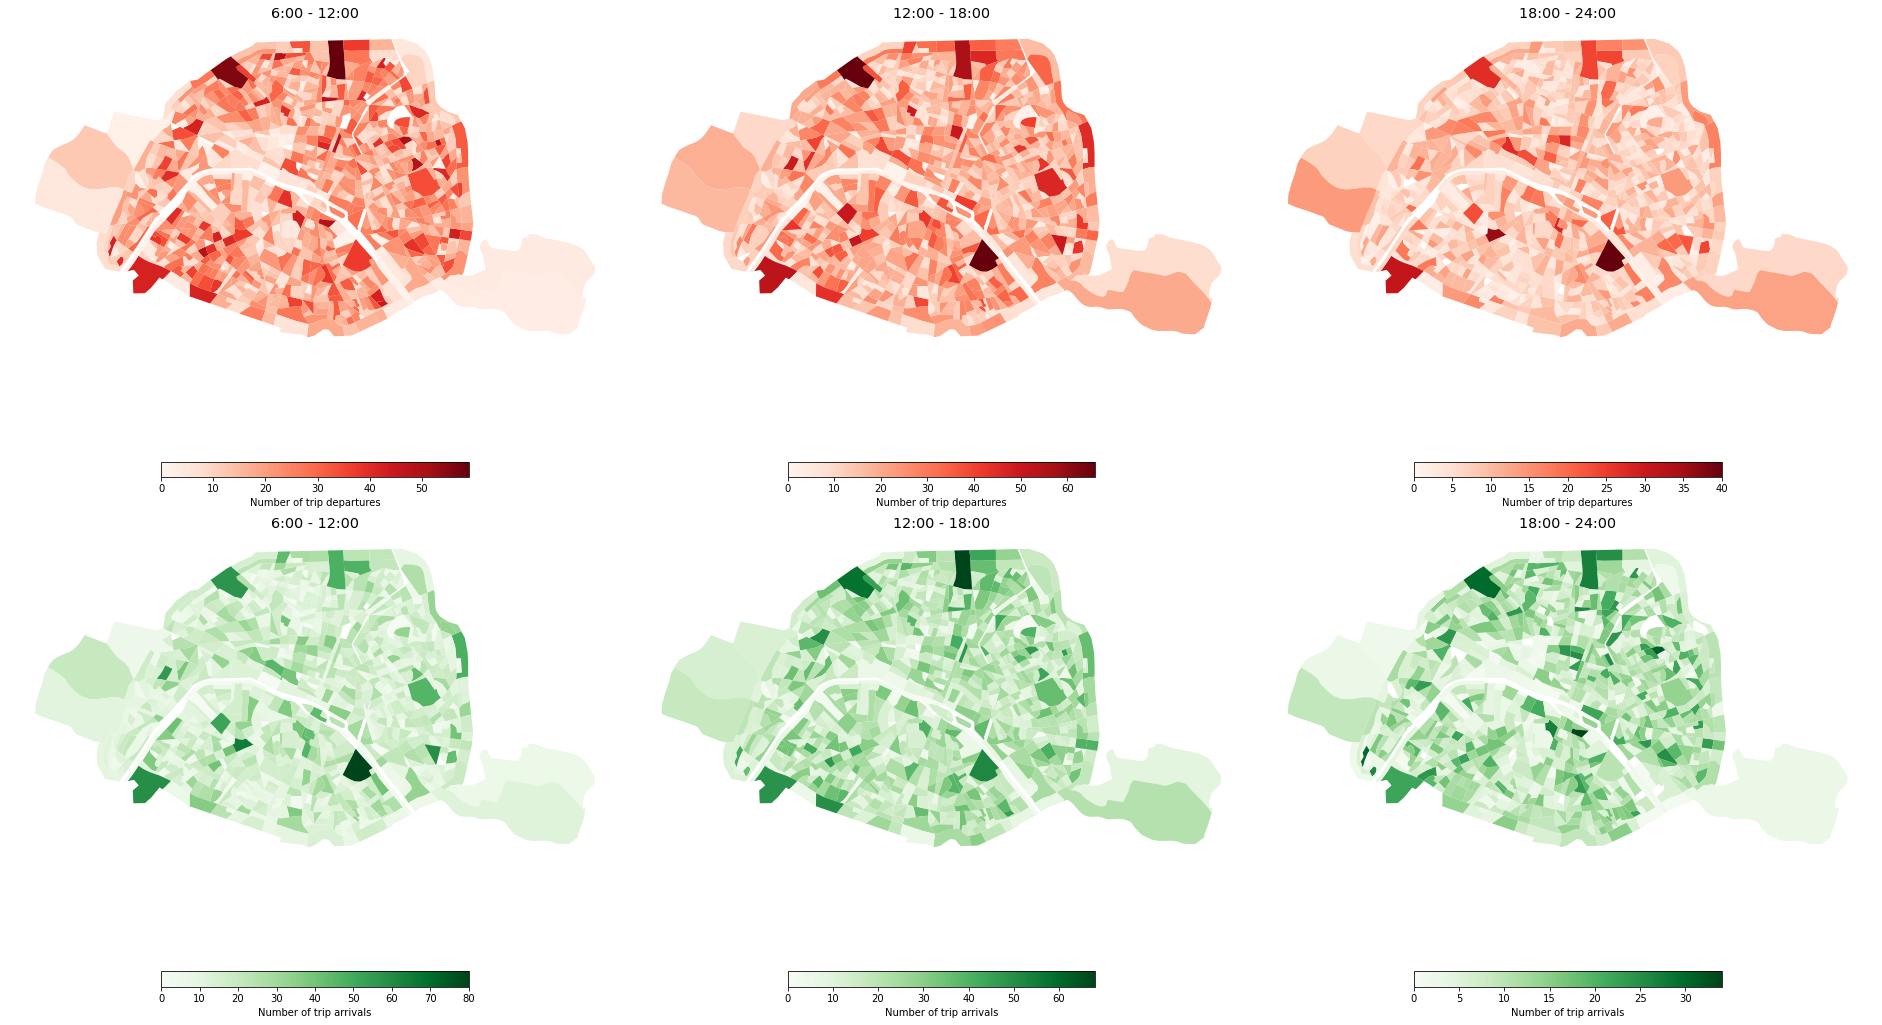

In [319]:
dep=gdf_idf_departements[gdf_idf_departements['code_dept']=='75']
com=gdf_idf_communes[gdf_idf_communes['numdep']==75]


ws=17.5
fig, ax=plt.subplots(figsize=(ws/2*3, ws), nrows=2, ncols=3, tight_layout=True)

for lb, up, k in zip([6, 12, 18], [12, 18, 24], [0, 1, 2]):
    
    gdf=gdf_raws[(gdf_raws['departure_time']>lb*3600) & (gdf_raws['departure_time']<up*3600)].copy()

    x=gdf.apply(lambda l: get_x(l['geometry']), axis=1)
    y=gdf.apply(lambda l: get_y(l['geometry']), axis=1)

    x_d=gdf.apply(lambda l: get_x_destination(l['geometry']), axis=1)
    y_d=gdf.apply(lambda l: get_y_destination(l['geometry']), axis=1)

    gdf_origins = gpd.GeoDataFrame(gdf['mode'], 
                                   geometry=gpd.points_from_xy(
                                       x, 
                                       y),
                                   crs=gdf.crs)

    gdf_destinations = gpd.GeoDataFrame(gdf['mode'],
                                        geometry=gpd.points_from_xy(
                                        x_d, 
                                        y_d),
                                        crs=gdf.crs)

    print('Same crs ?', gdf_idf.crs==gdf_origins.crs)
    print('Same crs ?', gdf_idf.crs==gdf_destinations.crs)

    plot_counts(gdf_origins, mp, com, dep, ax[0, k], 'Reds', d=True)
    plot_counts(gdf_destinations, mp, com, dep, ax[1, k], 'Greens', d=False)
    
    ax[0, k].set_title('{}:00 - {}:00'.format(lb, up), fontsize='x-large')
    ax[1, k].set_title('{}:00 - {}:00'.format(lb, up), fontsize='x-large')

#plt.show()

fig.savefig('data_pp.pdf', bbox_inches='tight')

In [283]:
fig.savefig('data_pp.jpg', dpi=300, bbox_inches='tight')

In [ ]:
origins=pd.read_csv('d.csv', ',')
destinations=pd.read_csv('a.csv', ',')

In [ ]:
full=origins.merge(destinations, on='CODE_IRIS')[['CODE_IRIS','counts_x','counts_y']]
full

In [ ]:
plt.plot(full.counts_x, full.counts_y,'o',ms=2.)
plt.plot([0, 40], [0, 40])


plt.yscale('log')
plt.xscale('log')
plt.grid(True, lw=0.1)

In [ ]:
x=gdf.apply(lambda l: get_x(l['geometry']), axis=1)
y=gdf.apply(lambda l: get_y(l['geometry']), axis=1)



gdf_origins = gpd.GeoDataFrame(gdf['mode'], geometry=gpd.points_from_xy(x, y), crs=gdf.crs)

new_gdf=gpd.overlay(gdf_idf, mp, how='intersection')

In [254]:
gdf_idf_communes.head()

,objectid,shape_leng,insee,nomcom,numdep,fusioinsee,nomcomto,st_areasha,st_lengths,geometry
0,12.0,16584.790269,77472.0,La TrÃ©toire,77.0,None,TrÃ©toire (la),9488102.0,16584.790269,"POLYGON ((3.26306 48.86013, 3.25931 48.86057, ..."
1,14.0,17789.556998,91315.0,Itteville,91.0,None,Itteville,12122472.0,17789.556998,"POLYGON ((2.35229 48.48979, 2.35034 48.49642, ..."
2,56.0,14907.999821,78472.0,Orsonville,78.0,None,Orsonville,9504775.5,14907.999821,"POLYGON ((1.83913 48.45803, 1.83457 48.46724, ..."
3,57.0,6894.430524,77038.0,Boissettes,77.0,None,Boissettes,1603038.0,6894.430524,"POLYGON ((2.60074 48.51583, 2.60209 48.52246, ..."
4,59.0,10681.144632,78672.0,Villennes-sur-Seine,78.0,None,Villennes-sur-Seine,5117345.0,10681.144632,"POLYGON ((2.00862 48.92070, 1.99811 48.92841, ..."


In [261]:
gdf_idf_departements[gdf_idf_departements['code_dept']=='75']

,id_geofla,code_dept,nom_dept,code_chf,nom_chf,x_chf_lieu,y_chf_lieu,x_centroid,y_centroid,code_reg,nom_reg,geometry
3,DEPARTEM0000000000000036,75,PARIS,101,PARIS,651679.0,6862426.0,650100.0,6862280.0,11,ILE-DE-FRANCE,"POLYGON ((647190.200 6864524.400, 647193.400 6..."


In [396]:
#

gdf=gdf_raws.copy()

x=gdf.apply(lambda l: get_x(l['geometry']), axis=1)
y=gdf.apply(lambda l: get_y(l['geometry']), axis=1)

x_d=gdf.apply(lambda l: get_x_destination(l['geometry']), axis=1)
y_d=gdf.apply(lambda l: get_y_destination(l['geometry']), axis=1)

print('ok')

gdf_origins = gpd.GeoDataFrame(gdf['mode'], 
                               geometry=gpd.points_from_xy(
                                   x, 
                                   y),
                               crs=gdf.crs)

gdf_destinations = gpd.GeoDataFrame(gdf['mode'],
                                    geometry=gpd.points_from_xy(
                                    x_d, 
                                    y_d),
                                    crs=gdf.crs)

print('ok')


new_gdf=gpd.overlay(gdf_origins ,gdf_idf_communes[['insee','geometry']], how='intersection')
new_gdf['insee']=new_gdf['insee'].astype(int)


print('ok')

gdf_idf_communes['insee']=gdf_idf_communes['insee'].astype(int)
vp=new_gdf['insee'].value_counts().reset_index().rename(columns={'index' : 'code', 'insee' : 'counts'})
vp['counts']=np.log(vp['counts'])
gdf_final=gdf_idf_communes.merge(new_gdf['insee'].value_counts().reset_index().rename(columns={'index' : 'code', 'insee' : 'counts'}), left_on='insee', right_on='code', how='left')

ok
ok


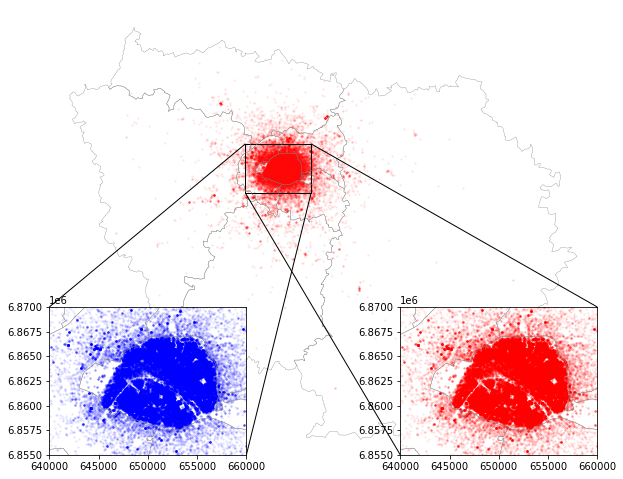

In [443]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset

fig, ax=plt.subplots(figsize=(10, 10))


gdf_idf_departements.boundary.plot(ax=ax, color='gray', lw=1./3)
gdf_origins.plot(ax=ax, markersize=5, color='red', edgecolor='k', lw=0., alpha=0.1)
# gdf_destinations.plot(ax=ax, markersize=5, color='blue', edgecolor='k', lw=0.)

# gdf_idf_communes.plot(ax=ax, color='lightgrey')
# gdf_final.plot(column='counts', ax=ax, cmap='Reds')
ax.axis('off')


axins = zoomed_inset_axes(ax, 3., loc='lower right')

# gdf_idf_communes.boundary.plot(ax=axins, color='gray', lw=1./3)
gdf_idf_departements.boundary.plot(ax=axins, color='gray', lw=1./3)
gdf_origins.plot(ax=axins, markersize=5, color='red', edgecolor='k', lw=0., alpha=0.1)
# gdf_destinations.plot(ax=axins, markersize=5, color='blue', edgecolor='k', lw=0.1)

x1,x2,y1,y2 = 640000, 660000, 6.855*10**6, 6.870*10**6
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)


pp, p1, p2 = mark_inset(ax, axins, loc1=1, loc2=3)

#pp.set_fill(False)
#pp.set_facecolor("lightgray")
#pp.set_edgecolor("k")

# axins.axis('off')



axins2 = zoomed_inset_axes(ax, 3., loc='lower left')

# gdf_idf_communes.boundary.plot(ax=axins, color='gray', lw=1./3)
gdf_idf_departements.boundary.plot(ax=axins2, color='gray', lw=1./3)
gdf_destinations.plot(ax=axins2, markersize=5, color='blue', edgecolor='k', lw=0., alpha=0.1)
# gdf_destinations.plot(ax=axins, markersize=5, color='blue', edgecolor='k', lw=0.1)

x1,x2,y1,y2 = 640000, 660000, 6.855*10**6, 6.870*10**6
axins2.set_xlim(x1,x2)
axins2.set_ylim(y1,y2)


pp, p1, p2 = mark_inset(ax, axins2, loc1=2, loc2=4)

In [444]:
fig.savefig('mob_patters.pdf', bbox_inches='tight')

In [230]:
labels=['work','education','leisure','shop','other','all']

for label in labels:
    link='files/tracker_{}.csv'.format(label)
    tracker=pd.read_csv(link)
    
    link='files/tracker_size_{}.csv'.format(label)
    tracker_p=pd.read_csv(link)
    
    print(np.round(tracker['counts'].value_counts()/tracker['counts'].value_counts().sum(),2))
    print('Number of places in', label, 'layer is {}'.format(len(tracker_p)))
    print(' ')

1     0.63
2     0.26
3     0.05
0     0.02
4     0.02
5     0.01
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
Name: counts, dtype: float64
Number of places in work layer is 112074
 
1    0.66
2    0.28
0    0.03
3    0.02
4    0.00
5    0.00
6    0.00
Name: counts, dtype: float64
Number of places in education layer is 10341
 
0    0.73
1    0.27
2    0.00
3    0.00
4    0.00
Name: counts, dtype: float64
Number of places in leisure layer is 50049
 
0    0.84
1    0.16
2    0.00
3    0.00
Name: counts, dtype: float64
Number of places in shop layer is 43715
 
0    0.91
1    0.09
2    0.00
3    0.00
Name: counts, dtype: float64
Number of places in other layer is 174073
 
Series([], Name: counts, dtype: float64)
Number of places in all layer is 232278
 


In [637]:
unq, cnt= np.unique(tracker_p['counts'], return_counts=True)

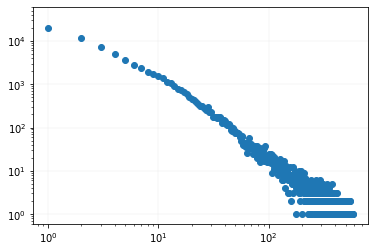

In [640]:
plt.loglog(cnt, 'o')
plt.grid(True, lw=0.1)

In [641]:
n=6
pp=0.28

print('full graph {}'.format((n-1)*n/2))
print('random graph {}'.format(pp*np.math.factorial(n)/(np.math.factorial(2)*np.math.factorial(n-2))))

full graph 15.0
random graph 4.2


In [598]:
p=np.math.factorial(n)/(np.math.factorial(2)*np.math.factorial(n-2))/((n-1)*n/2)
p

1.0

In [297]:
pd.read_csv('files/tracker_all.csv')['counts'].value_counts()

0     14932265
1     10035519
2      2652893
3       385079
4       113565
5        45559
6        13926
7         6873
8          447
9           35
10           6
11           1
Name: counts, dtype: int64

In [291]:
#l=pd.read_csv('files/tracker_all.csv')['counts'].value_counts()
#print((l/l.sum()).values)
#print(l.index)



for i, j in zip(l.index, (l/l.sum()).values):
    if i==0:
        nb-=nb_tot*j
    else:
        nb+=nb_tot*j*i

0.4702272050602977
0.35604410645675566
0.09412038557351961
0.01366198484306203
0.004029103920759999
0.0016163601948303154
0.0004940721278607294
0.00024384300838624107
1.585884253581402e-05
1.2417438227147442e-06
2.1287036960824188e-07
3.547839493470698e-08


In [235]:
from tqdm import tqdm

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.40it/s]

w that minimizes f is 19.48979591836735


Text(0, 0.5, 'Deviation')

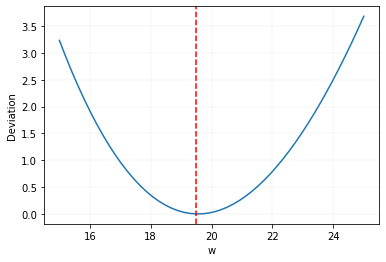

In [296]:
p=pd.read_csv('files/tracker_size_all.csv')['counts'].values

# vector of places

def f(w, p, l):
    nb_of_contacts=0
    N=p.sum()
    
    # np.math.factorial(n)/(np.math.factorial(2)*np.math.factorial(n-2))/tracker_p['counts'].sum()*pp
    
    for n in p:
        if n>1:
            #q=np.math.factorial(n)/(np.math.factorial(2)*np.math.factorial(n-2))*pp/n
            q=0
            
            
            # with GAMMA
            #mean=w*(n-1)/(w+n-1)
            #std=np.sqrt(0.35)
            #variance=std**2
    
            #scale=variance/mean
            #shape=mean/scale
    
            #nb_of_contacts+=(n/N)*np.random.gamma(shape=shape, scale=scale, size=1)[0]
            
            # without GAMMA
            nb_of_contacts+=(n/N)*(q+w*(n-1)/(w+n-1))
            
    for i, j in zip(l.index, (l/l.sum()).values):
        if i==0:
            nb_of_contacts-=nb_of_contacts*j
        else:
            nb_of_contacts+=nb_of_contacts*j*i

    return nb_of_contacts

# f(15, p)

target=10.
estimates=[]

ws=np.linspace(15,25,50)

with tqdm(total=len(ws)) as pbar:
    for w in ws:
        estimates.append((f(w, p, l)-target)**2)
        pbar.update(1)

plt.plot(ws, estimates)
plt.axvline(x=ws[np.argmin(estimates)], color='red', ls='--')
plt.grid(True, lw=0.1)

print('w that minimizes f is {}'.format(ws[np.argmin(estimates)]))

plt.xlabel('w')
plt.ylabel('Deviation')

n= 13.309475019311128 / p= 0.7745966692414834
moy. 3.8676/ moy. target 3.0


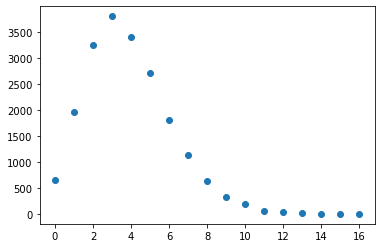

In [690]:
# mean=n*q
# variance=n*q/p**2

mean=3.
variance=5

p=np.sqrt(mean/variance)

assert p<=1, "p>1 !"

q=1-p
n=mean/q


print('n= {} / p= {}'.format(n, p))
unq, cnt= np.unique(np.random.negative_binomial(n=n, p=p, size=20000), return_counts=True)
plt.plot(unq, cnt, 'o')

print('moy. {}/ moy. target {}'.format(np.random.negative_binomial(n=n, p=p, size=20000).mean(), mean))

In [256]:
def sample_d(ws=15., n=10):
    mean=ws*(n-1)/(ws+n-1)
    std=np.sqrt(0.35)
    variance=std**2
    

    scale=variance/mean
    shape=mean/scale
    
    avg=np.random.gamma(shape=shape, scale=scale, size=1)[0]

    return np.random.poisson(avg, 1)[0]

n=4
sample_d(10, n)>(n-1)

False

In [184]:
f=pd.read_csv('files/contacts_per_individual.csv')
df_persons=pd.read_csv('data/persons.csv',';')
df_persons['nbdc']=f['0'].values

C:\Users\saadi\Anaconda3\envs\contact_network\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


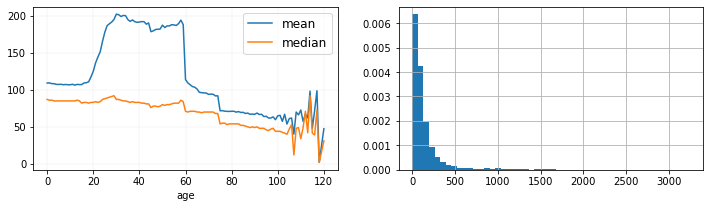

In [216]:
fig, (axa, axb)=plt.subplots(ncols=2, figsize=(3*4,3))

df_persons[['age','nbdc']].groupby('age').mean().plot(ax=axa)
df_persons[['age','nbdc']].groupby('age').median().plot(ax=axa)
df_persons['nbdc'].hist(ax=axb, bins=50, density=True)

axa.grid(True, lw=0.1)
axa.legend(['mean', 'median'],fontsize='large')
plt.show()

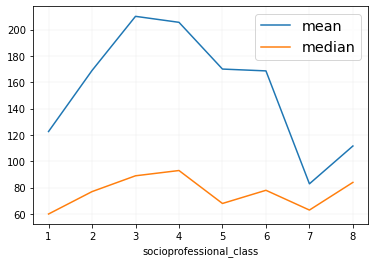

In [201]:
fig, ax=plt.subplots()

df_persons[['socioprofessional_class','nbdc']].groupby('socioprofessional_class').mean().plot(ax=ax)
df_persons[['socioprofessional_class','nbdc']].groupby('socioprofessional_class').median().plot(ax=ax)

ax.grid(True, lw=0.1)
ax.legend(['mean', 'median'],fontsize='x-large')
plt.show()

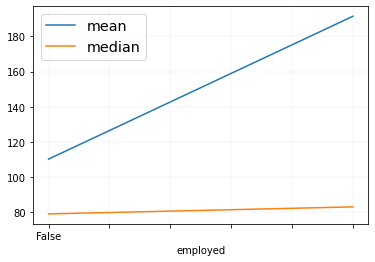

In [207]:
fig, ax=plt.subplots()

df_persons[['employed','nbdc']].groupby('employed').mean().plot(ax=ax)
df_persons[['employed','nbdc']].groupby('employed').median().plot(ax=ax)

ax.grid(True, lw=0.1)
ax.legend(['mean', 'median'],fontsize='x-large')
plt.show()

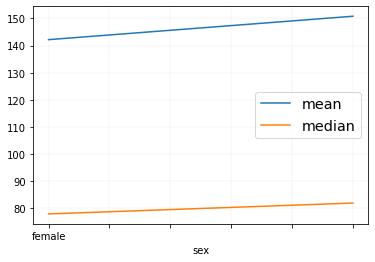

In [208]:
fig, ax=plt.subplots()

df_persons[['sex','nbdc']].groupby('sex').mean().plot(ax=ax)
df_persons[['sex','nbdc']].groupby('sex').median().plot(ax=ax)

ax.grid(True, lw=0.1)
ax.legend(['mean', 'median'],fontsize='x-large')
plt.show()

In [206]:
df_persons

,person_id,household_id,age,employed,sex,socioprofessional_class,has_driving_license,has_pt_subscription,census_person_id,hts_id,nbdc
0,6,2,42,True,female,5,False,True,2,4091,13.0
1,7,2,13,False,female,8,False,False,3,6657,74.0
2,8,2,13,False,female,8,False,False,3,7484,15.0
3,9,2,13,False,female,8,False,True,3,6013,93.0
4,10,2,15,False,female,8,False,True,4,2216,56.0
...,...,...,...,...,...,...,...,...,...,...,...
3527397,3083630,1512463,45,False,male,8,True,True,1171595,10916,280.0
3527398,3221226,1567040,45,False,male,8,True,True,1215028,10916,271.0
3527399,6525783,2929449,33,False,male,8,False,False,2373642,8864,106.0
3527400,7410524,3335720,43,False,male,8,False,False,2728527,8864,95.0


In [ ]:
fig, ax=plt.subplots()

df_persons[['socioprofessional_class','nbdc']].groupby('socioprofessional_class').mean().plot(ax=ax)
df_persons[['socioprofessional_class','nbdc']].groupby('socioprofessional_class').median().plot(ax=ax)

ax.grid(True, lw=0.1)
ax.legend(['mean', 'median'],fontsize='x-large')
plt.show()

In [157]:
ft=f['0'].value_counts().values[np.argsort(f['0'].value_counts().index)]

In [158]:
a, b=np.histogram(f['0'].values,bins=2**8, density=False)
#plt.xlim(0, 0.1*10**6)
#plt.grid(True, lw=0.1)
#plt.axvline(x=f['0'].values.max(), lw=0.5, color='r',label='max')
#plt.legend(loc='best')
#plt.show()

<BarContainer object of 99 artists>

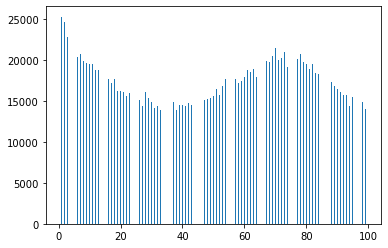

In [160]:
ub=100
lb=1
plt.bar(np.arange(len(ft))[lb:ub], ft[lb:ub], width=0.25)
#plt.xlim(0, 1/10*10**6)

243.88734837445918


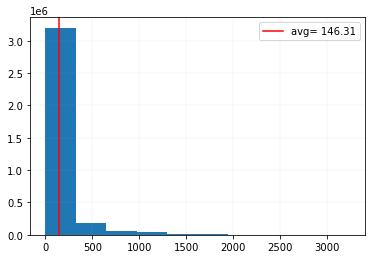

In [183]:
a=plt.hist(f['0'].values)
#plt.xlim(-10,500)
plt.grid(True, lw=0.1)
plt.axvline(x=np.mean(f['0'].values), color='r', label='avg= '+str(np.round(np.mean(f['0'].values),2)))
# plt.axvline(x=np.std(f['0'].values), color='g', label='std= '+str(np.round(np.std(f['0'].values),2)))
print(np.std(f['0'].values))
# plt.ylim(0, 3500)
plt.legend()
plt.show()

In [179]:
f['0'].values.max()

3238.0

In [61]:
f['0'].max()

3197294.0

In [224]:
fp=pd.read_csv('files/tracker_size_all.csv')

In [226]:
fp['counts'].shape

(359023,)

In [223]:
n=2515

(n-1)*n/2

3161355.0

In [67]:
(2515-1)*2515/2

3161355.0

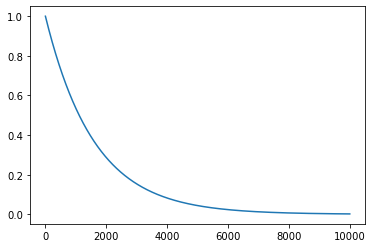

In [123]:
x=np.arange(10000)+2


b=40
def f(x,b):
    return np.exp(-(x-2)/b**2)

plt.plot(x,f(x,b))
#plt.axhline(y=b)

In [115]:
f(x,b)

array([1.00000000e+00, 9.98001999e-01, 9.96007989e-01, ...,
       2.07355772e-09, 2.06941475e-09, 2.06528005e-09])

In [155]:
n=15000

n*(n-1)/2

112492500.0

In [227]:
dd=pd.read_csv('files/full_activities_with_ids.csv').drop(['Unnamed: 0'], axis=1).rename(columns={'uid':'location_id'})

In [228]:
dd.head()

,person_id,household_id,activity_index,preceding_trip_index,following_trip_index,purpose,start_time,end_time,is_first,is_last,location_id
0,6,2,0,-1,0,home,NaN,28289.0,True,False,0
1,6,2,3,2,-1,home,67289.0,NaN,False,True,0
2,7,2,0,-1,0,home,NaN,32240.0,True,False,0
3,7,2,2,1,2,home,44240.0,48440.0,False,False,0
4,7,2,4,3,-1,home,60440.0,NaN,False,True,0


In [229]:

hh=10
dd[(dd['start_time']>hh*3600) & (dd['start_time']<(hh+1)*3600)]

,person_id,household_id,activity_index,preceding_trip_index,following_trip_index,purpose,start_time,end_time,is_first,is_last,location_id
21,1167673,621133,1,0,1,other,37534.0,39934.0,False,False,1
36,1572453,836245,3,2,3,work,37610.0,43910.0,False,False,2
75,352540,188125,3,2,3,other,37159.0,39559.0,False,False,3
87,506766,270026,1,0,1,education,36290.0,45890.0,False,False,3
152,2047055,1089811,2,1,2,other,38664.0,38964.0,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...
14396971,11757609,5225323,3,2,-1,home,37957.0,NaN,False,True,1079087
14396973,11757610,5225324,3,2,-1,home,37929.0,NaN,False,True,1079088
14397081,11758034,5225748,2,1,-1,home,37706.0,NaN,False,True,1079131
14397083,11758039,5225753,2,1,-1,home,38408.0,NaN,False,True,1079132


C:\Users\saadi\AppData\Local\Temp/ipykernel_26348/941414748.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return K*(1-np.exp(-n/T))


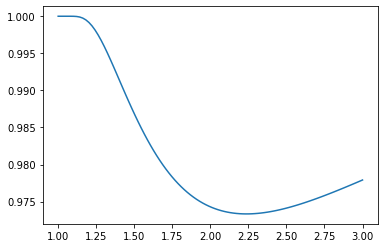

In [274]:
n=np.linspace(1, 3, 100)

def f(n):
    K=1.
    T=K*np.tan((n-1)/n)
    return K*(1-np.exp(-n/T))

plt.plot(n,[f(k) for k in n])
#plt.plot([0,2],[0,2])

In [265]:
n=10
T=K*np.tan((n-1)/n)
T

2.5203164351006784